# Generating random numbers following known pdf with python libraries

# more on ```random``` function

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import random
#help(random)

### exponential

In [7]:
help(random.expovariate)

Help on method expovariate in module random:

expovariate(lambd) method of random.Random instance
    Exponential distribution.
    
    lambd is 1.0 divided by the desired mean.  It should be
    nonzero.  (The parameter would be called "lambda", but that is
    a reserved word in Python.)  Returned values range from 0 to
    positive infinity if lambd is positive, and from negative
    infinity to 0 if lambd is negative.



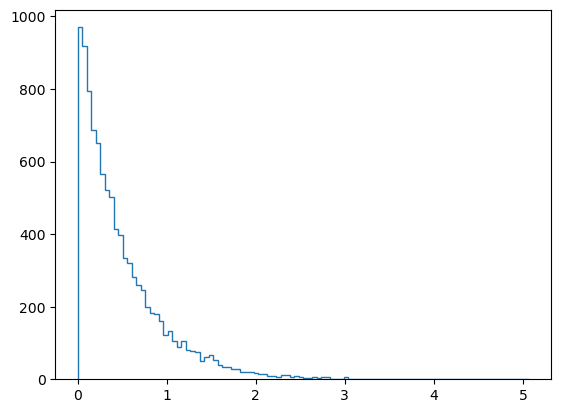

In [8]:
N = 10000
x = [random.expovariate(2) for i in range(N)]
plt.hist(x, bins=100, histtype='step')
plt.show()

In [9]:
np.std(x)

0.48979087420121636

In [10]:
np.mean(x)

0.4922695571816657

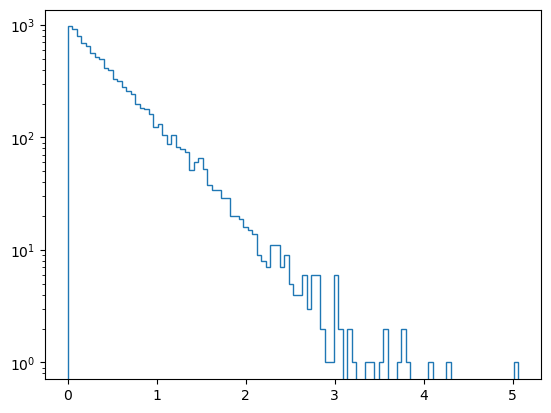

In [11]:
plt.hist(x, bins=100, histtype='step')
plt.yscale('log')
plt.show()

### gaussian

In [12]:
help(random.gauss)

Help on method gauss in module random:

gauss(mu, sigma) method of random.Random instance
    Gaussian distribution.
    
    mu is the mean, and sigma is the standard deviation.  This is
    slightly faster than the normalvariate() function.
    
    Not thread-safe without a lock around calls.



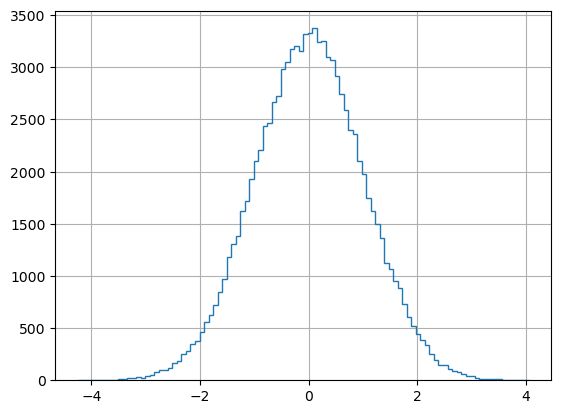

In [13]:
N = 100000
x = [random.gauss(0, 1) for i in range(N)]
plt.hist(x, bins=100, histtype='step')
plt.grid()
plt.show()

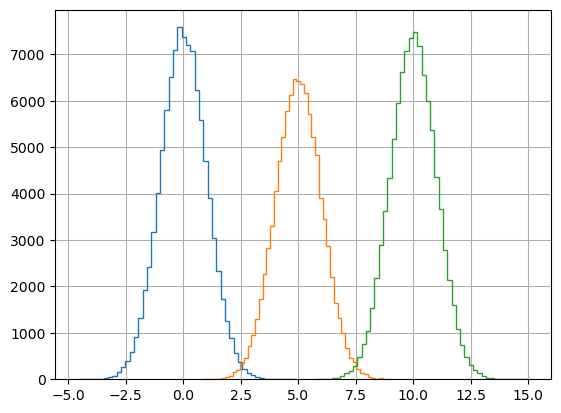

In [20]:
N = 100000
for mu in [0, 5, 10]:
    x = [random.gauss(mu, 1) for i in range(N)]
    plt.hist(x, bins=50, histtype='step')
plt.grid()
plt.show()

# using ```numpy.random```

### uniform distribution in [0,1[

In [2]:
np.random.rand(3)

array([0.55877343, 0.20418408, 0.84725472])

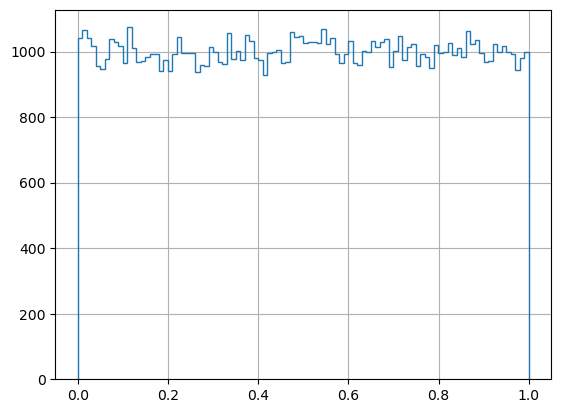

In [3]:
N = 100000
plt.hist(np.random.rand(N), bins=100, histtype='step')
plt.grid()
plt.show()

### uniform distribution in [a,b[

In [4]:
a=1
b=5
np.random.uniform(a, b, 3)

array([1.42699525, 3.69411906, 1.10952721])

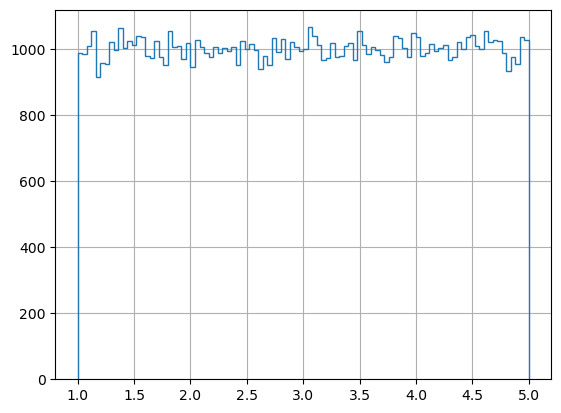

In [5]:
N = 100000
plt.hist(np.random.uniform(a, b, N), bins=100, histtype='step')
plt.grid()
plt.show()

### binomial

In [6]:
help(np.random.binomial)

Help on built-in function binomial:

binomial(...) method of numpy.random.mtrand.RandomState instance
    binomial(n, p, size=None)
    
    Draw samples from a binomial distribution.
    
    Samples are drawn from a binomial distribution with specified
    parameters, n trials and p probability of success where
    n an integer >= 0 and p is in the interval [0,1]. (n may be
    input as a float, but it is truncated to an integer in use)
    
    .. note::
        New code should use the ``binomial`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    n : int or array_like of ints
        Parameter of the distribution, >= 0. Floats are also accepted,
        but they will be truncated to integers.
    p : float or array_like of floats
        Parameter of the distribution, >= 0 and <=1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
  

In [7]:
np.random.binomial(n=10, p=0.5, size=10) 
# n = number of trials, p = probability of success in each trial, 
# return the number of succeses over # size repetitions of the experiment

array([6, 9, 3, 6, 7, 5, 8, 3, 5, 3])

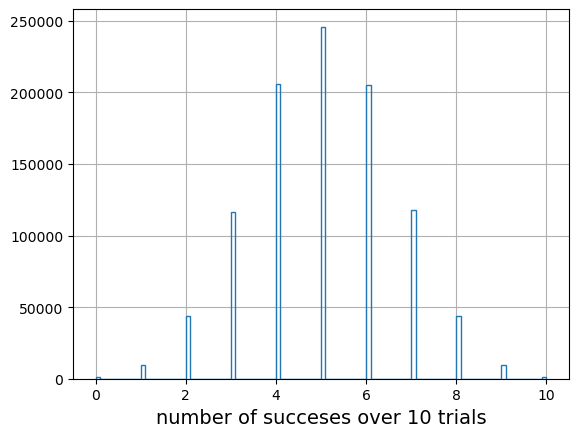

In [8]:
N = 1000000
r=np.random.binomial(n=10, p=0.50, size=N)
plt.hist(r, bins=100, histtype='step')
plt.xlabel('number of succeses over 10 trials', size=14)
plt.grid()
plt.show()

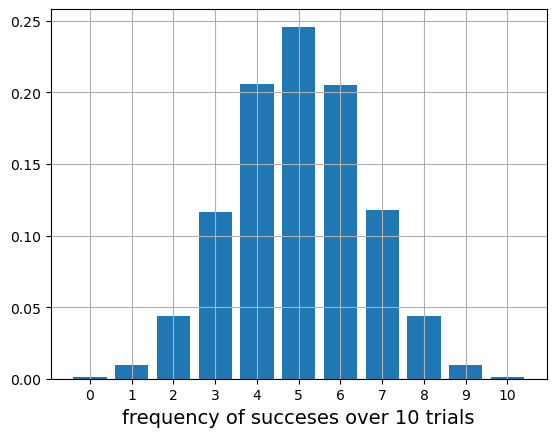

In [9]:
unique, counts = np.unique(r, return_counts=True)

fig = plt.figure()
plt.bar(unique, counts/np.sum(counts))
plt.xlabel('frequency of succeses over 10 trials', size=14)
plt.grid()
plt.xticks(unique)
plt.show()

In [10]:
np.mean(r)

4.999415

In [11]:
np.std(r)

1.5808689565473157

In [12]:
np.sqrt(10*0.5*0.5)

1.5811388300841898

### poisson

In [15]:
np.random.poisson(1, 10)

array([1, 1, 2, 1, 0, 1, 2, 1, 3, 2])

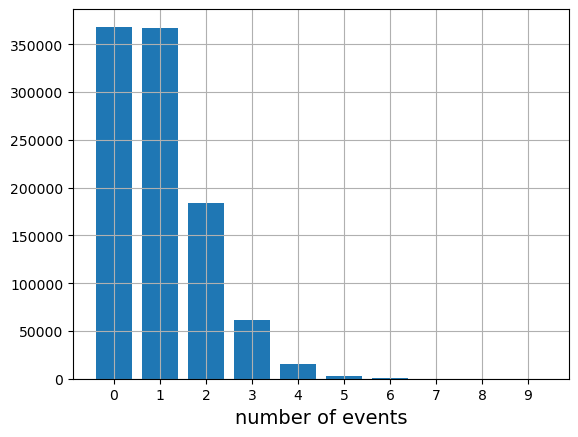

In [16]:
N = 1000000
r=np.random.poisson(1, N)

unique, counts = np.unique(r, return_counts=True)

fig = plt.figure()
plt.bar(unique, counts)
plt.xlabel('number of events', size=14)
plt.grid()
plt.xticks(unique)
plt.show()

In [17]:
np.mean(r)

0.999502

In [18]:
np.std(r)

1.0008754927542187

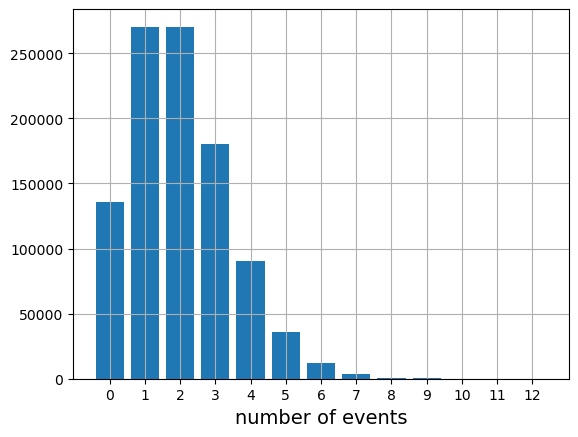

In [19]:
N = 1000000
r=np.random.poisson(2, N)

unique, counts = np.unique(r, return_counts=True)
fig = plt.figure()
plt.bar(unique, counts)
plt.xlabel('number of events', size=14)
plt.grid()
plt.xticks(unique)
plt.show()

In [20]:
np.mean(r)

1.999404

In [21]:
np.median(r)

2.0

In [22]:
np.std(r)

1.4144934233795508

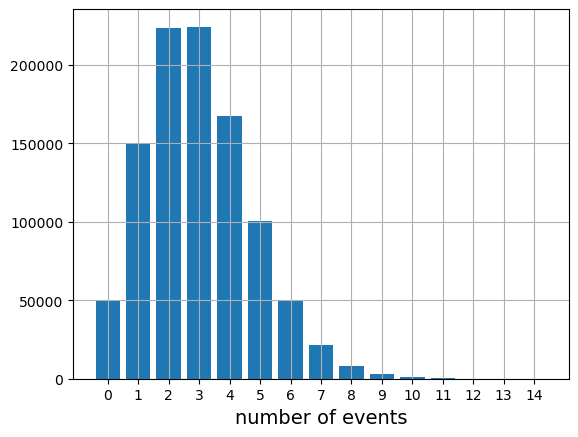

In [23]:
N = 1000000
r=np.random.poisson(3, N)

unique, counts = np.unique(r, return_counts=True)
fig = plt.figure()
plt.bar(unique, counts)
plt.xlabel('number of events', size=14)
plt.grid()
plt.xticks(unique)
plt.show()

In [24]:
np.mean(r)

2.998743

In [25]:
np.median(r)

3.0

In [26]:
np.std(r)

1.73336880667416

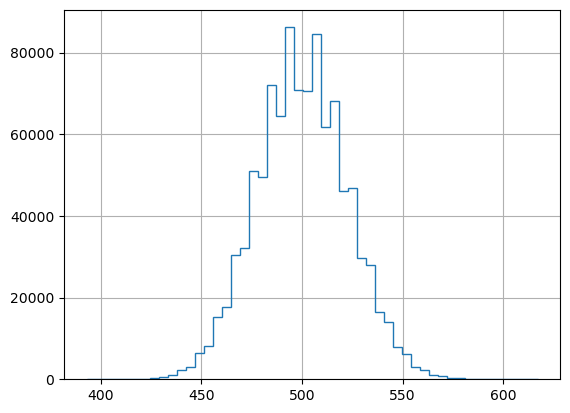

In [27]:
N = 1000000

mu = 500

r=np.random.poisson(mu, N)
plt.hist(r, bins=50, histtype='step')
plt.grid()
plt.show()

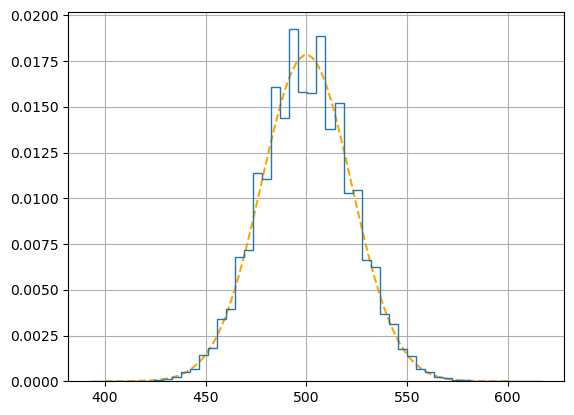

In [28]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))/np.sqrt(2*np.pi*sig**2)

x_values = np.linspace(400, 600, 100)
plt.plot(x_values, gaussian(x_values, mu, np.sqrt(mu)), '--', color='orange')
plt.hist(r, bins=50, density=True, histtype='step')
plt.grid()
plt.show()

In [29]:
np.mean(r)

499.993356

In [30]:
np.std(r)

22.367405434186235

### exponential

In [31]:
np.random.exponential(1, 10)

array([0.06517322, 0.79050584, 0.19670835, 1.8731643 , 1.65561023,
       3.48843079, 0.31987888, 0.43986914, 0.38717493, 0.12468604])

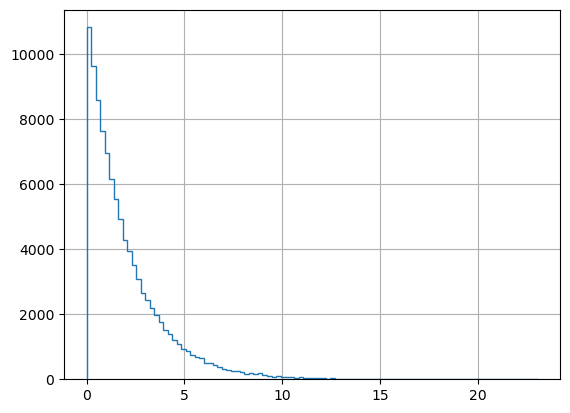

In [32]:
N = 100000
r = np.random.exponential(2, N)
plt.hist(r, bins=100, histtype='step')
plt.grid()
plt.show()

In [33]:
np.mean(r)

1.9984265733713396

In [34]:
np.std(r)

1.9910659451387276

### normal

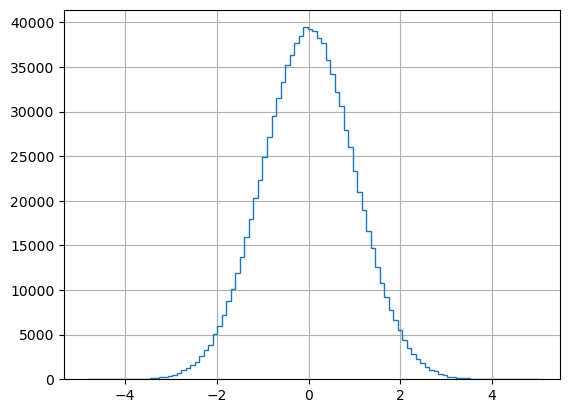

In [35]:
N = 1000000
r = np.random.normal(size=N)
plt.hist(r, bins=100, histtype='step')
plt.grid()
plt.show()

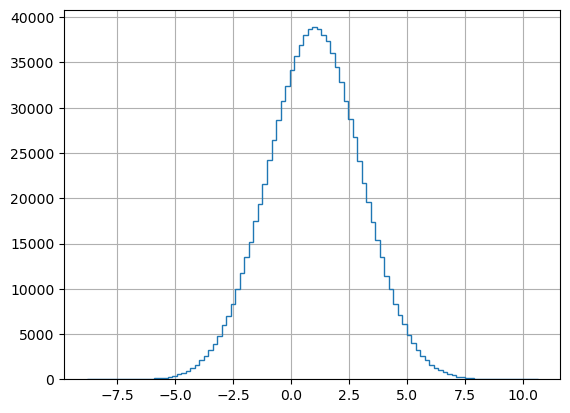

In [36]:
N = 1000000
r = np.random.normal(loc=1, scale=2, size=N)
plt.hist(r, bins=100, histtype='step')
plt.grid()
plt.show()

In [37]:
np.mean(r)

1.000513762516532

In [38]:
np.std(r)

2.0006680925929787

### chi square

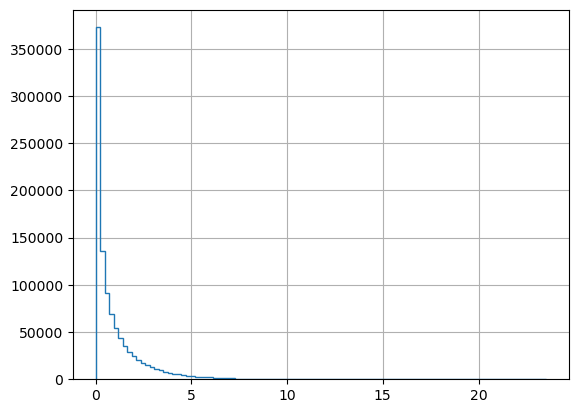

In [39]:
N = 1000000
r = np.random.chisquare(df=1, size=N)
plt.hist(r, bins=100, histtype='step')
plt.grid()
plt.show()

In [40]:
np.mean(r)

0.9983254642068873

In [41]:
np.std(r)

1.4106578837623904

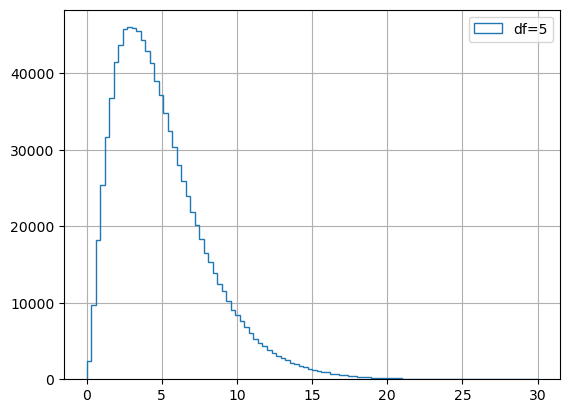

In [42]:
N = 1000000

i=5
r = np.random.chisquare(df=i, size=N)
plt.hist(r, range=[0, 30], bins=100, histtype='step', label=f'df={i}')
plt.grid()
plt.legend()
plt.show()

In [43]:
np.mean(r)

4.996322573112469

In [44]:
np.median(r)

4.345370422020202

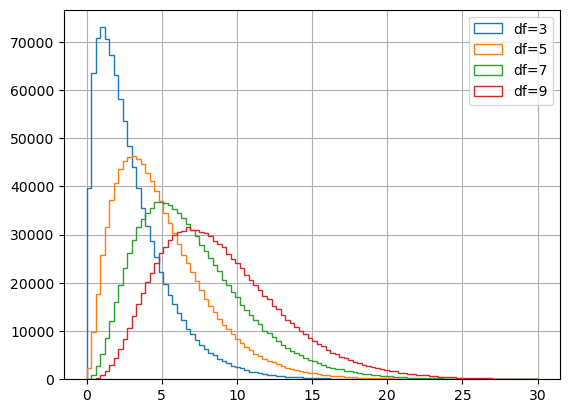

In [45]:
N = 1000000

for i in [3,5,7,9]:
    r = np.random.chisquare(df=i, size=N)
    plt.hist(r, range=[0, 30], bins=100, histtype='step', label=f'df={i}')
plt.grid()
plt.legend()
plt.show()

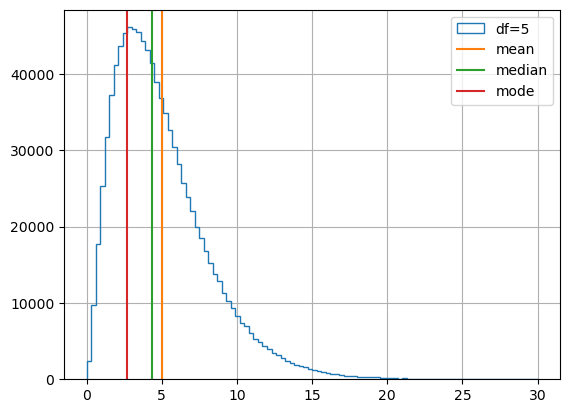

In [46]:
N = 1000000

i=5
r = np.random.chisquare(df=i, size=N)
hist, bins, spare = plt.hist(r, range=[0, 30], bins=100, histtype='step', label=f'df={i}')
mode = bins[np.argmax(hist)]
plt.axvline(x = np.mean(r), color='C1', label = 'mean')
plt.axvline(x = np.median(r), color='C2', label = 'median')
plt.axvline(x = mode, color='C3', label = 'mode')
plt.grid()
plt.legend()
plt.show()

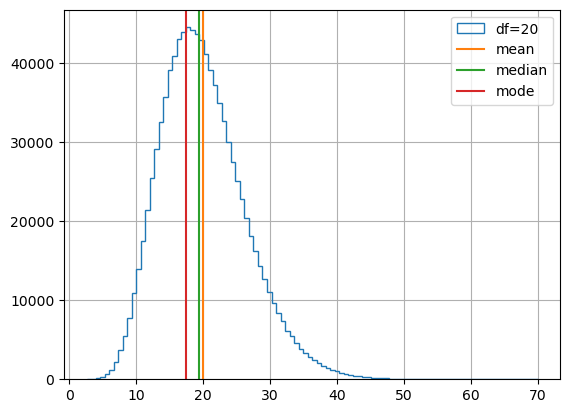

In [47]:
N = 1000000

i=20
r = np.random.chisquare(df=i, size=N)
hist, bins, spare = plt.hist(r, bins=100, histtype='step', label=f'df={i}')
mode = bins[np.argmax(hist)]
plt.axvline(x = np.mean(r), color='C1', label = 'mean')
plt.axvline(x = np.median(r), color='C2', label = 'median')
plt.axvline(x = mode, color='C3', label = 'mode')
plt.grid()
plt.legend()
plt.show()

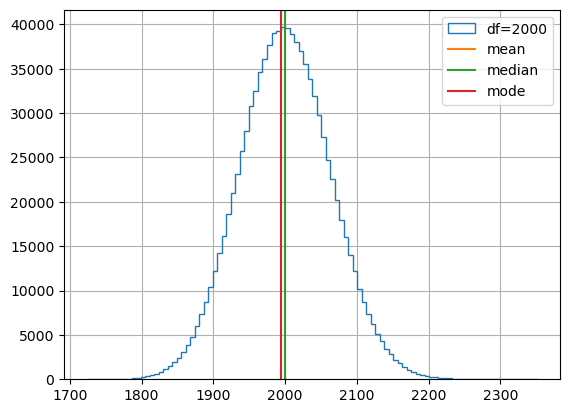

In [48]:
N = 1000000

i=2000
r = np.random.chisquare(df=i, size=N)
hist, bins, spare = plt.hist(r, bins=100, histtype='step', label=f'df={i}')
mode = bins[np.argmax(hist)]
plt.axvline(x = np.mean(r), color='C1', label = 'mean')
plt.axvline(x = np.median(r), color='C2', label = 'median')
plt.axvline(x = mode, color='C3', label = 'mode')
plt.grid()
plt.legend()
plt.show()